In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
#Import the data
df  = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
# Creating a dataframe to summarize the dataset information
data_info = pd.DataFrame({
    "Data Type": df.dtypes,
    "Unique Values": df.nunique(),
    "Missing Values": df.isnull().sum(),
    "Missing Values %": (df.isnull().sum() / len(df)) * 100
})

data_info


,Data Type,Unique Values,Missing Values,Missing Values %
Type,object,4,0,0.000000
Days for shipping (real),int64,7,0,0.000000
Days for shipment (scheduled),int64,4,0,0.000000
Benefit per order,float64,21998,0,0.000000
Sales per customer,float64,2927,0,0.000000
Delivery Status,object,4,0,0.000000
Late_delivery_risk,int64,2,0,0.000000
Category Id,int64,51,0,0.000000
Category Name,object,50,0,0.000000
Customer City,object,563,0,0.000000


Here's a summary of the dataset:

1. **Data Types and Uniqueness:** The dataset comprises various data types like object, int64, and float64. Several columns have a high number of unique values, indicating a wide range of data (e.g., 'Benefit per order' has 21,998 unique values).

2. **Missing Values:** Certain columns have missing values, with 'Order Zipcode' having the highest percentage of missing data (86.24%). 'Product Description' is entirely empty (100% missing values).

3. **Potential Redundancies:** Some columns, like 'Customer Email' and 'Customer Password', have only one unique value, indicating potential redundancy.

4. **Inconsistencies:** There are inconsistencies in columns like 'Customer Lname' and 'Customer Zipcode', which have missing values despite being key customer information.

Based on this summary, we need to carefully handle missing data, consider dropping columns with no variation or high percentages of missing values, and ensure proper data type conversion where necessary.

In [5]:
# Removing columns with 0 or 1 unique values and specific customer-related columns
columns_to_drop = data_info[data_info['Unique Values'] <= 1].index.tolist()
columns_to_drop.extend(['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Street','Customer Zipcode','Product Image','Order Zipcode' ])

# Dropping the columns from the dataframe
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


The dataset has been updated with the following modifications:

1. **Columns Removed:** Columns with 0 or 1 unique values, as well as specific customer-related columns like 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', and 'Customer Street','Customer Zipcode' have been removed. This helps to streamline the dataset by eliminating redundant or unnecessary information.

2. **Reduced Column Count:** The dataset now consists of 46 columns, reduced from the original count. This should make the dataset more manageable and relevant for further analysis or modeling.

3. **Preserved Essential Information:** Key columns related to shipping, sales, product details, and order information have been retained, ensuring that crucial aspects of the supply chain data are still available for analysis.

4. **Data Integrity Maintained:** The removal of these columns should not affect the integrity of the remaining data, allowing for accurate analysis or predictive modeling

Next steps in preprocessing could include further handling of missing values and check if any further columns can be removed.

In [6]:
# Rounding all float variables to 2 decimal places except for Latitude and Longitude
float_columns = df.select_dtypes(include=['float64']).columns
float_columns = [col for col in float_columns if col not in ['Latitude', 'Longitude']]

df[float_columns] = df[float_columns].round(2)

# Display the first few rows of the modified dataframe
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.39,0.05,179254,327.75,-0.80,1,327.75,311.36,-249.09,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.03,0.06,179253,327.75,-0.80,1,327.75,309.72,-247.78,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.94,0.07,179252,327.75,0.08,1,327.75,304.81,22.86,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.50,0.09,179251,327.75,0.45,1,327.75,298.25,134.21,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [7]:
# Replace '/' with '-' in 'order date (DateOrders)' and 'shipping date (DateOrders)'
df['order date (DateOrders)'] = df['order date (DateOrders)'].str.replace('/', '-')
df['shipping date (DateOrders)'] = df['shipping date (DateOrders)'].str.replace('/', '-')

# Converting 'order date (DateOrders)' and 'shipping date (DateOrders)' to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], format="%m-%d-%Y %H:%M")
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], format="%m-%d-%Y %H:%M")

# Extracting date and time for 'order date (DateOrders)'
df['Order Date'] = df['order date (DateOrders)'].dt.date
df['Order Time'] = df['order date (DateOrders)'].dt.time

# Extracting date and time for 'shipping date (DateOrders)'
df['Shipping Date'] = df['shipping date (DateOrders)'].dt.date
df['Shipping Time'] = df['shipping date (DateOrders)'].dt.time

# Remove the original datetime columns
df = df.drop(columns=['order date (DateOrders)', 'shipping date (DateOrders)'])

# Display the first few rows of the modified dataframe
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Order Date,Order Time,Shipping Date,Shipping Time
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class,2018-01-31,22:56:00,2018-02-03,22:56:00
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,75939,1360,16.39,0.05,179254,327.75,-0.80,1,327.75,311.36,-249.09,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class,2018-01-13,12:27:00,2018-01-18,12:27:00
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,75938,1360,18.03,0.06,179253,327.75,-0.80,1,327.75,309.72,-247.78,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class,2018-01-13,12:06:00,2018-01-17,12:06:00
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,75937,1360,22.94,0.07,179252,327.75,0.08,1,327.75,304.81,22.86,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class,2018-01-13,11:45:00,2018-01-16,11:45:00
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,75936,1360,29.50,0.09,179251,327.75,0.45,1,327.75,298.25,134.21,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,2018-01-13,11:24:00,2018-01-15,11:24:00


By converting the original datetime columns to separate date and time components, we aim to enhance the dataset's granularity and facilitate more in-depth analysis. Reordering the columns ensures the information remains organized, while removing the redundant original datetime columns streamlines the dataset, making it more suitable for analysis

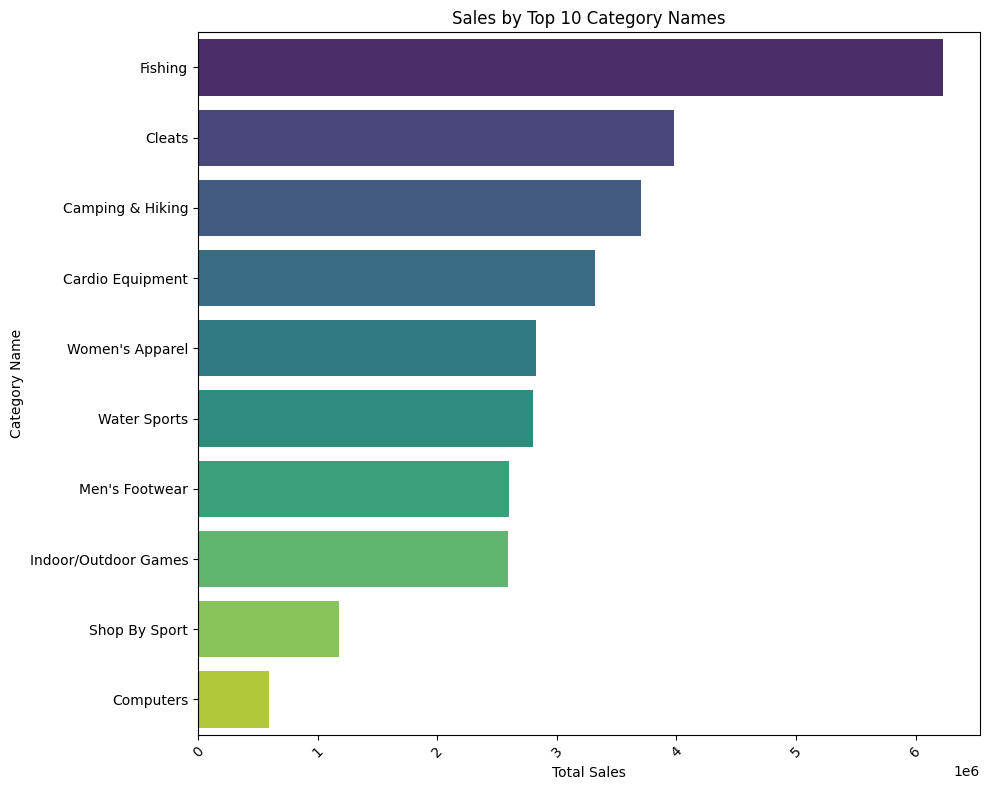

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales per customer by category name
sales_by_category = df.groupby('Category Name')['Sales per customer'].sum().sort_values(ascending=False)

# Select the top 10 categories
top_10_categories = sales_by_category.head(10)

# Create a bar chart for the top 10 categories
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Sales by Top 10 Category Names')
plt.xlabel('Total Sales')
plt.ylabel('Category Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



### Interpretation of Data in the Graph
The graph illustrates a clear hierarchy in sales performance across different categories, with certain categories dominating in terms of sales volume. This suggests that customer preferences are concentrated in specific areas, possibly due to trends, product quality, or marketing effectiveness.

### Business Implications
1. **Focus Areas for Inventory and Marketing**: Categories with higher sales should be prioritized for inventory stocking and marketing campaigns. This focus could help in capitalizing on existing customer preferences and trends.
2. **Potential for Diversification**: Categories with lower sales present opportunities for analysis. Understanding why these categories underperform—whether due to lack of awareness, insufficient stock variety, or other reasons—can inform strategies to boost their sales.

### Recommendations
1. **Enhance Marketing and Promotions**: For high-performing categories, consider increasing marketing efforts and promotional activities to maximize sales potential. This could include online advertising, in-store displays, or seasonal sales.
2. **Market Research for Underperforming Categories**: Conduct market research to understand the barriers to higher sales in underperforming categories. Customer feedback, competitive analysis, and sales data can guide product development, pricing strategies, and marketing to improve performance.


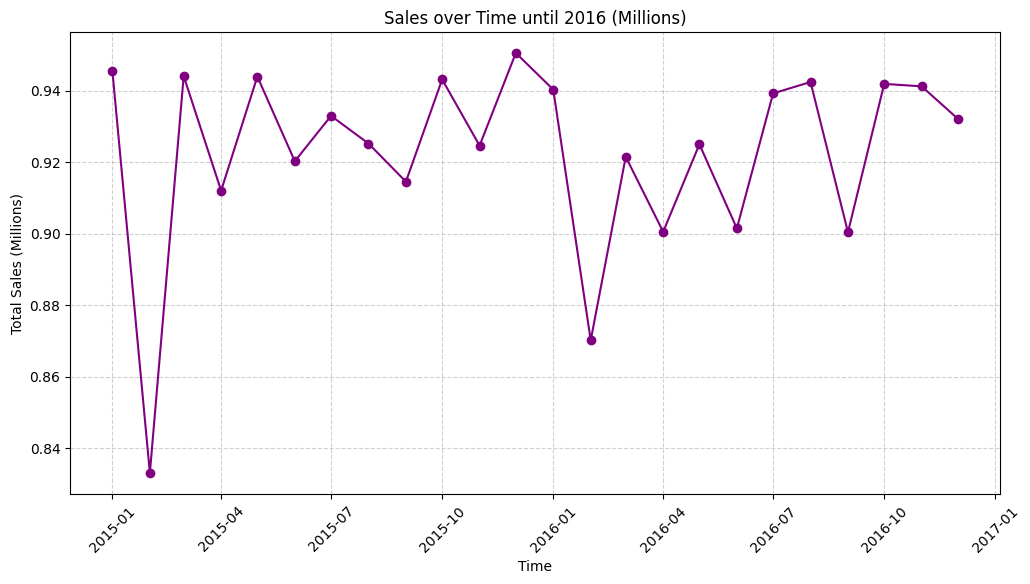

In [26]:
import numpy as np

# Filter data for years up to 2016
sales_over_time_until_2016 = sales_over_time[sales_over_time.index.year <= 2016]

# Scale down sales units to 1 * 10^6
sales_over_time_scaled = sales_over_time_until_2016 / 1e6

# Create a figure and axes for the line graph
fig, ax = plt.subplots(figsize=(12, 6))

# Line Graph of Sales over Time until 2016
ax.plot(sales_over_time_scaled.index.to_timestamp(), sales_over_time_scaled.values, marker='o', linestyle='-', color='purple', label='Sales (Millions)')

# Additional formatting for the line graph
ax.set_title('Sales over Time until 2016 (Millions)')
ax.set_xlabel('Time')
ax.set_ylabel('Total Sales (Millions)')

ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.6)

# Show the line graph
plt.show()


### Line Graph of Sales over Time: Insights and Analysis

#### Interpretation
The line graph illustrates the trend of sales over time, showcasing how sales volumes have fluctuated across different periods. Peaks and troughs in the graph may correspond to seasonal variations, marketing campaigns, or other external factors affecting sales.

#### Business Implications
1. **Trend Identification**: Identifying upward or downward trends in sales over time can help in understanding the overall market dynamics and the effectiveness of sales strategies.
2. **Seasonality and Event Impact**: The graph helps in pinpointing periods of high and low sales, which may be influenced by seasonality, holidays, or promotional events, offering insights into consumer behavior.

#### Recommendations
1. **Strategic Planning for Seasonality**: Prepare for expected seasonal fluctuations by adjusting inventory levels, staffing, and marketing efforts to match anticipated demand.
2. **Marketing and Promotions Analysis**: Evaluate the impact of marketing campaigns and promotions by analyzing spikes in sales, and use these insights to plan future marketing activities more effectively.
3. **Long-term Strategy Development**: Use insights from sales trends to inform long-term business strategies, such as market expansion, product development, and customer engagement initiatives.

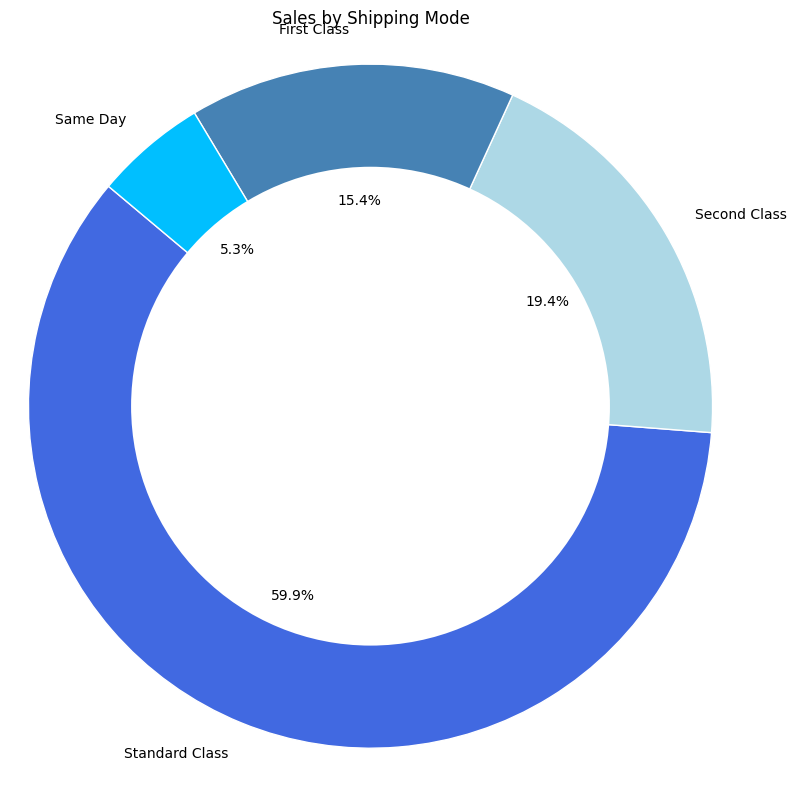

In [ ]:
import matplotlib.pyplot as plt

# Aggregate sales by shipping mode
sales_by_shipping_mode = df.groupby('Shipping Mode')['Sales per customer'].sum().sort_values(ascending=False)

# Create a donut chart for Sales by Shipping Mode
plt.figure(figsize=(8, 8))
colors = ['royalblue', 'lightblue', 'steelblue', 'deepskyblue']
plt.pie(sales_by_shipping_mode.values, labels=sales_by_shipping_mode.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

# Draw a white circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Sales by Shipping Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

plt.show()


#### Business Implications
1. **Customer Preferences**: The most popular shipping modes may reflect customer priorities, such as delivery speed, cost, or convenience.
2. **Operational Efficiency**: High-performing shipping modes in terms of sales might also indicate areas where the operational process is efficient and well-received by customers.

#### Recommendations
1. **Optimize Popular Shipping Modes**: Further invest in and optimize the shipping modes that generate the most sales. This could involve improving delivery times, reducing costs, or enhancing the customer experience.
2. **Evaluate Underperforming Shipping Modes**: For shipping modes that contribute less to overall sales, consider whether improvements could make them more attractive or if resources would be better allocated elsewhere.
3. **Customer Feedback and Analysis**: Conduct customer surveys or analyze purchase behavior to understand why certain shipping modes are preferred. Use this feedback to tailor shipping options more closely to customer preferences.

This analysis helps to align shipping strategies with customer expectations and operational capabilities, potentially leading to improved customer satisfaction and increased sales.


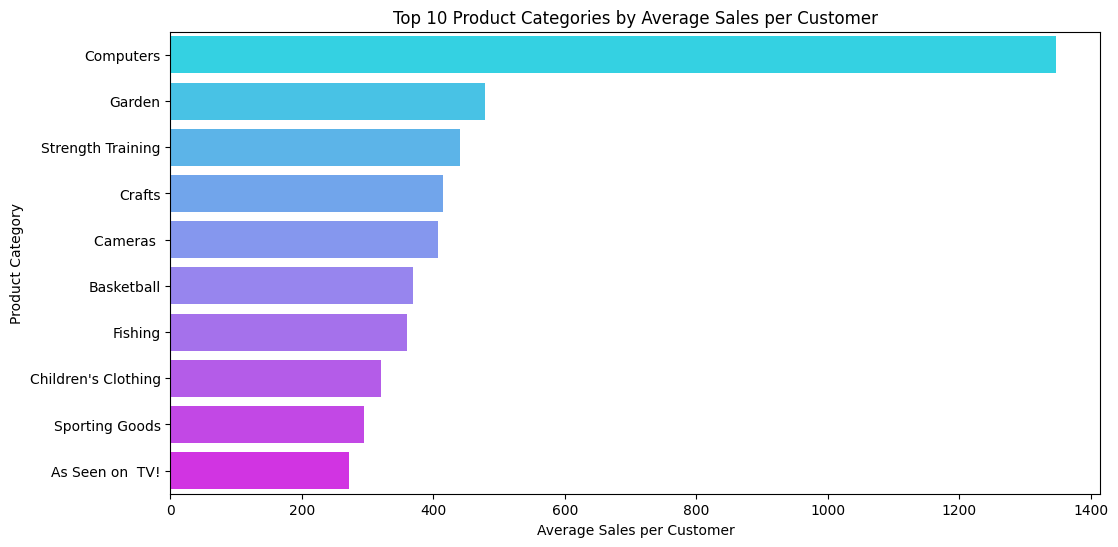

In [ ]:
# Calculate average sales per customer by product category
avg_sales_by_category = df.groupby('Category Name')['Sales per customer'].mean().sort_values(ascending=False).head(10)

# Prepare data for the box plot
days_for_shipping_real = df[['Days for shipping (real)', 'Shipping Mode']]

# Generating Average Sales per Customer by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_by_category.values, y=avg_sales_by_category.index, palette='cool')
plt.title('Top 10 Product Categories by Average Sales per Customer')
plt.xlabel('Average Sales per Customer')
plt.ylabel('Product Category')

plt.show()



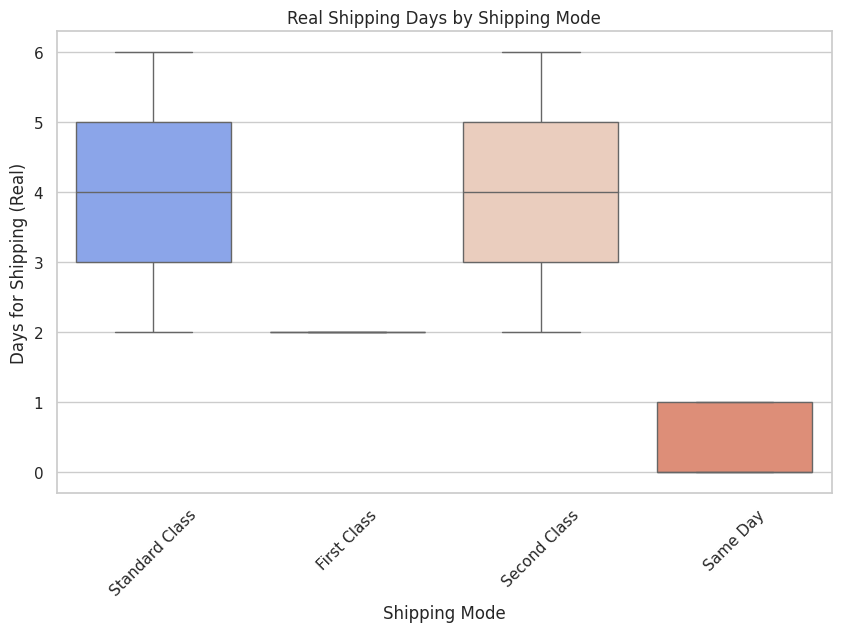

In [ ]:
#  Box Plot of Days for shipping (real) by Shipping Mode
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Shipping Mode", y="Days for shipping (real)", palette="coolwarm")
plt.title('Real Shipping Days by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Days for Shipping (Real)')
plt.xticks(rotation=45)
plt.show()



###  Real Shipping Days by Shipping Mode

**Explanation of Results:**
1. The box plot shows significant variation in "Days for shipping (real)" across different "Shipping Modes," with Standard Class having the widest interquartile range.
2. Premium delivery modes like "Same Day" and "First Class" show tighter distributions, indicating more consistent delivery times.
3. Outliers in "Standard Class" and "Second Class" suggest occasional significant delays beyond typical delivery times.

**Business Implications:**
1. **Standard Class Vulnerabilities:** The high variability in delivery times for Standard Class shipping could lead to customer dissatisfaction and unreliable service perceptions.
2. **Premium Delivery Reliability:** Customers using premium shipping options are likely experiencing more reliable delivery times, which could justify higher shipping fees.
3. **Operational Efficiency:** The presence of outliers, especially in slower shipping modes, points to operational inefficiencies that need addressing.

**Recommendations:**
1. **Improve Standard Class Consistency:** Implement measures to reduce variability in Standard Class delivery times, possibly through better logistics planning and carrier partnerships.
2. **Promote Premium Shipping:** Highlight the reliability of premium shipping modes in marketing communications to encourage uptake among customers seeking faster delivery.
3. **Analyze and Address Delays:** Conduct a thorough analysis of cases behind significant shipping delays and develop targeted strategies to mitigate such issues in the future.

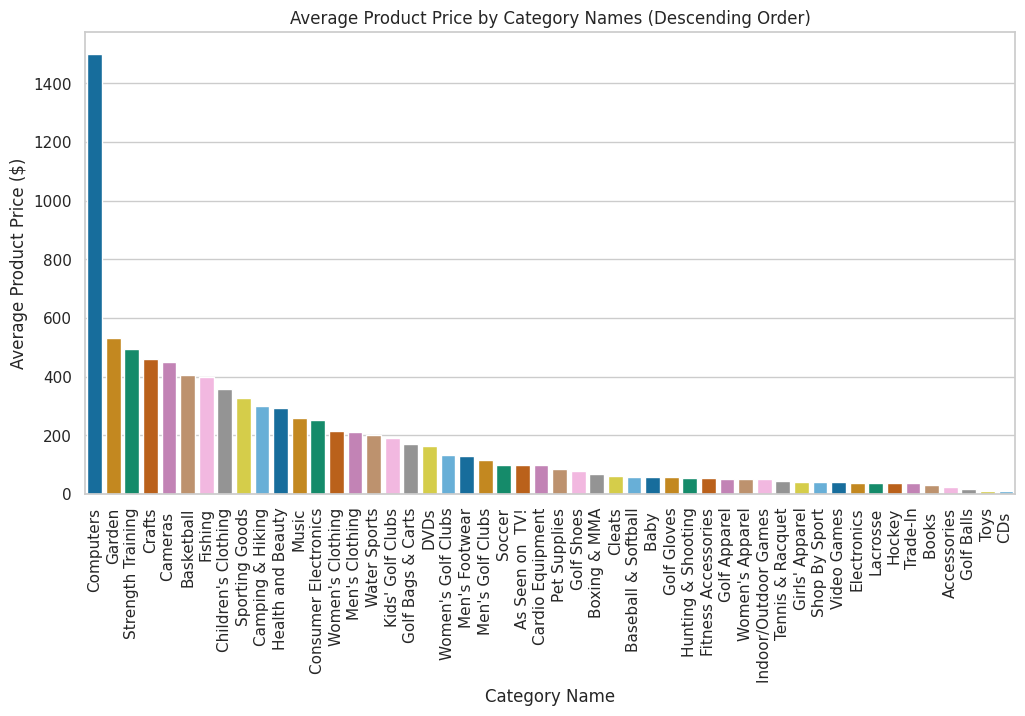

In [ ]:

# Calculate the average Product Price by Category Names and sort them in descending order
average_prices = df.groupby("Category Name")["Product Price"].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_prices.index, y=average_prices.values, palette="colorblind")
plt.title('Average Product Price by Category Names (Descending Order)')
plt.xlabel('Category Name')
plt.ylabel('Average Product Price ($)')
plt.xticks(rotation=90)
plt.show()


### Graph: Average Product Price by Category Names (Descending Order)

**Explanation of Results:**
- The bar plot displays the average product price across different categories, sorted in descending order. Categories at the left have the highest average prices, indicating they might consist of premium products or those with higher production costs.

**Business Implications:**
1. **Product Positioning and Strategy:** Categories with higher average prices may be positioned as premium offerings. Understanding how pricing aligns with customer perception and market position is crucial for each category.
2. **Inventory and Stock Management:** Categories with higher average prices might require more capital to maintain inventory levels, impacting stock management and investment strategies.
3. **Sales and Marketing Focus:** The pricing strategy across categories will influence sales and marketing efforts. Categories with high average prices might require targeted marketing strategies to reach the right customer segments.

**Recommendations:**
1. **Review Pricing Strategies:** For categories with high average prices, ensure that pricing strategies are aligned with the target market's willingness to pay and perceived value.
2. **Customized Marketing:** Develop marketing campaigns that highlight the unique value or quality of products in higher-priced categories to justify their premium pricing.
3. **Competitive Analysis:** Conduct a competitive analysis to ensure that prices in each category remain competitive without sacrificing margins, especially in high-average-price categories.

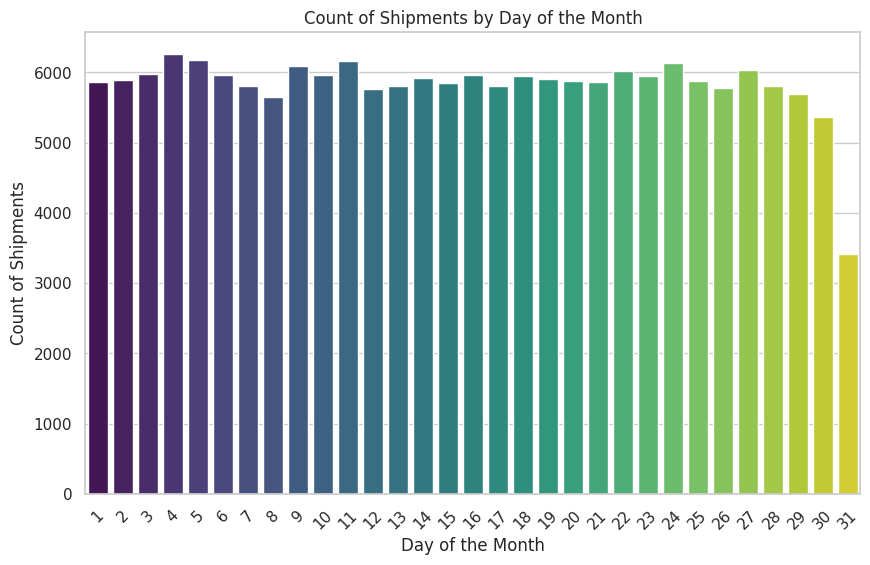

In [ ]:
# Convert 'Shipping Date' to datetime format
df['Shipping Date'] = pd.to_datetime(df['Shipping Date'])

# Extract hour of the day, day of the month, and month of the year
df['Shipping Hour'] = df['Shipping Date'].dt.hour
df['Shipping Day'] = df['Shipping Date'].dt.day
df['Shipping Month'] = df['Shipping Date'].dt.month

#  Count of Shipments by Day of the Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Day', data=df, palette='viridis')
plt.title('Count of Shipments by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count of Shipments')
plt.xticks(rotation=45)
plt.show()





###  Count of Shipments by Day of the Month

**Explanation of Results:**
- The graph reveals how shipment volumes vary across different days of the month, with certain days showing higher activity.

**Business Implications:**
1. **Promotional Impact:** Peaks may coincide with promotional events or paydays, influencing customer purchasing behavior.
2. **Inventory Management:** Anticipating days with higher shipment volumes can guide inventory restocking and management strategies.
3. **Resource Allocation:** Knowing which days are busiest for shipments allows for more effective resource allocation and scheduling.

**Recommendations:**
1. **Promotional Planning:** Schedule promotions or sales events in alignment with historical shipment peaks to capitalize on high customer activity.
2. **Improve Inventory Turnover:** Prepare for high shipment days by ensuring adequate inventory levels and optimizing turnover rates.
3. **Enhance Customer Experience:** Ensure customer service and support are adequately staffed on peak shipment days to maintain service quality.

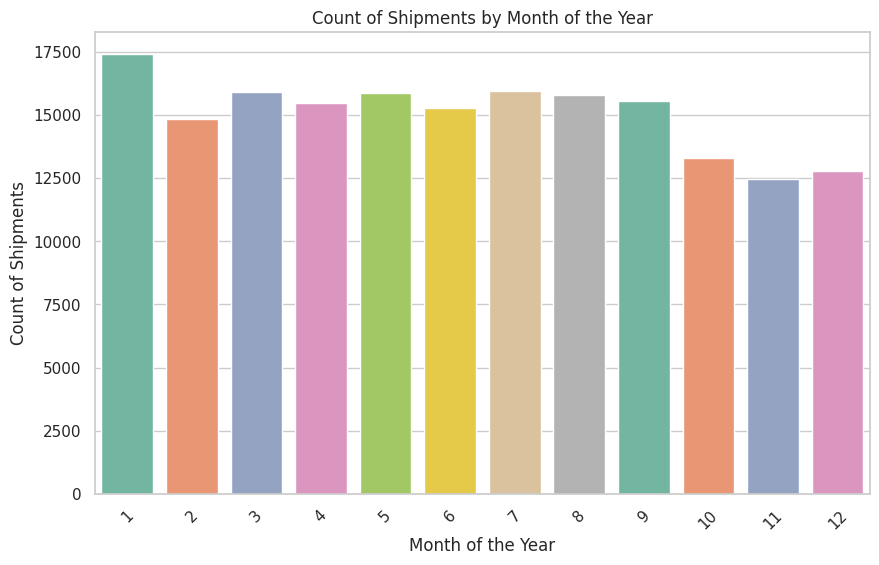

In [ ]:
# Count of Shipments by Month of the Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Month', data=df, palette='Set2')
plt.title('Count of Shipments by Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Shipments')
plt.xticks(rotation=45)
plt.show()

### Count of Shipments by Month of the Year

**Explanation of Results:**
- This visualization indicates which months experience the highest number of shipments, potentially reflecting seasonal purchasing trends or promotional impacts.

**Business Implications:**
1. **Seasonal Sales Trends:** High shipment volumes during specific months may reflect seasonal buying patterns, important for marketing and sales strategy.
2. **Strategic Planning:** Planning for months with high shipment volumes by adjusting marketing efforts, inventory levels, and logistics operations is crucial.
3. **Yearly Performance Analysis:** Understanding monthly shipment trends contributes to evaluating overall yearly performance and planning for future growth.

**Recommendations:**
1. **Seasonal Marketing Campaigns:** Tailor marketing campaigns and promotions to precede expected peak shipment months, maximizing sales opportunities.
2. **Logistics and Supply Chain Adjustments:** Prepare for months with historically high shipment volumes by optimizing supply chain and logistics operations in advance.
3. **Yearly Review and Planning:** Use insights from monthly shipment trends for yearly strategic planning, aiming to smooth out demand or capitalize on peak periods.

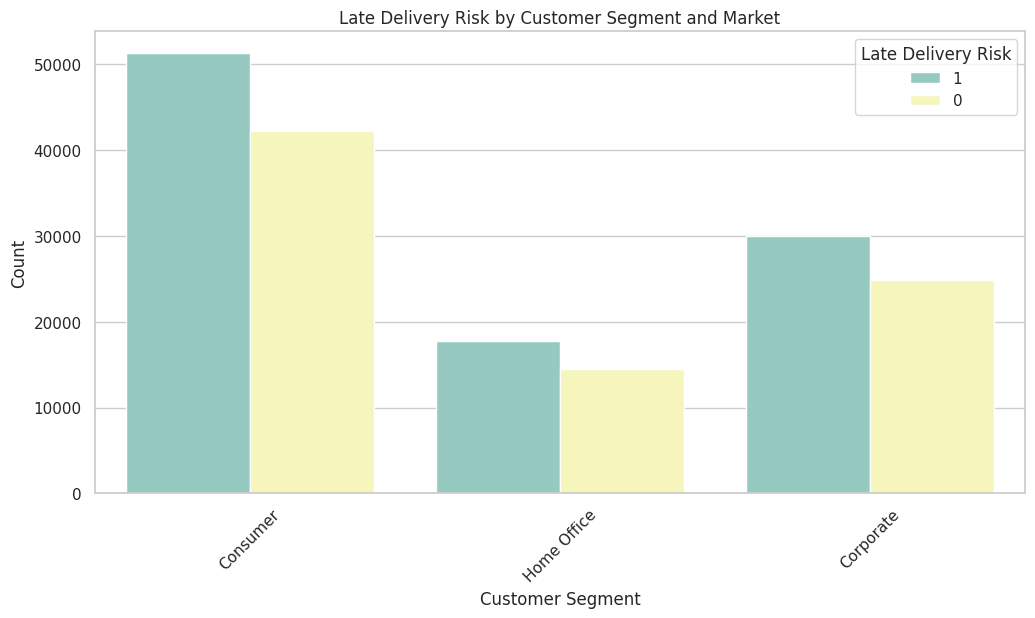

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Customer Segment', hue='Late_delivery_risk', data=df, palette="Set3", hue_order=[1, 0])
plt.title('Late Delivery Risk by Customer Segment and Market')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Late Delivery Risk')
plt.show()


### Interpretations:
1. **Customer Segment Distribution**: There is a significant number of late deliveries in all customer segments, with the 'Consumer' segment showing the highest count of both late (risk = 1) and on-time (risk = 0) deliveries.
2. **Late Delivery Incidence**: Late deliveries are prevalent across all customer segments. However, the 'Home Office' segment has a proportionally higher risk of late delivery compared to the 'Consumer' and 'Corporate' segments.
3. **Market Performance**: The chart does not differentiate by market, but the title suggests that market data might be relevant. If market data were included, one could assess if certain markets have higher late delivery risks.

### Business Implications:
1. **Customer Satisfaction**: Late deliveries across all segments can negatively impact customer satisfaction, repeat business, and brand reputation, especially in segments where late delivery is proportionally higher.
2. **Operational Efficiency**: The prevalence of late deliveries implies potential inefficiencies in logistics, inventory management, or demand forecasting, especially in the 'Home Office' segment.
3. **Segment-Specific Strategies**: Different customer segments may have different expectations and delivery requirements. Tailoring logistics strategies to each segment could improve delivery performance.

### Recommendations:
1. **Enhance Logistics for Home Office Segment**: Given the higher late delivery risk, the 'Home Office' segment may benefit from a dedicated logistics review and improvement program.
2. **Segment-Based Analysis**: Perform a more granular analysis of delivery performance within each segment to identify specific pain points and develop targeted solutions.
3. **Customer Communication and Expectation Management**: Improve communication with customers regarding expected delivery times, and consider offering compensations or incentives for late deliveries to maintain customer relations.

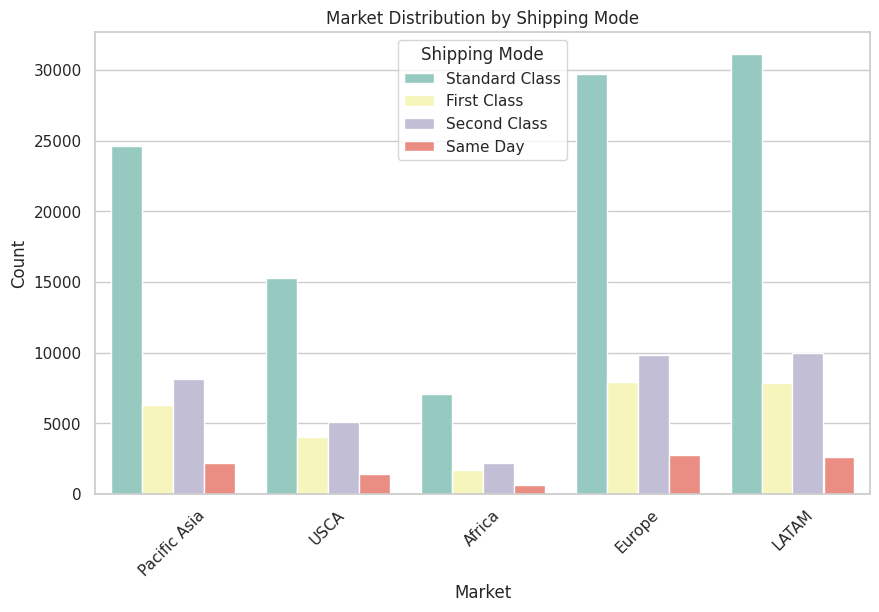

In [ ]:
# This bar plot explores the distribution of markets for different shipping modes.
plt.figure(figsize=(10, 6))
sns.countplot(x='Market', hue='Shipping Mode', data=df, palette='Set3')
plt.title('Market Distribution by Shipping Mode')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Shipping Mode')
plt.show()



### Interpretations:
1. **Dominance of Standard Class**: Standard Class shipping is the most used mode across all markets, indicating that customers prioritize cost over speed or are satisfied with the delivery time it offers.
2. **Variation by Market**: There are noticeable differences in the use of shipping modes by market. The Pacific Asia and LATAM markets show a significant preference for Standard Class, with very little use of Same Day shipping.
3. **Limited Same Day Shipping**: Same Day shipping is the least used mode in all markets, which could be due to higher costs, limited availability, or lesser demand for such expedited services.

### Business Implications:
1. **Market Preferences**: Different markets have distinct preferences or requirements for shipping speed, potentially influenced by local infrastructure, customer expectations, or shipping costs.
2. **Cost Sensitivity**: The preference for Standard Class suggests that cost may be a significant factor for customers when choosing shipping options, possibly more so than delivery speed.
3. **Opportunity for Premium Services**: The low use of Same Day shipping could indicate an under-served segment of the market that might be willing to pay for faster delivery if the option is marketed effectively.

### Recommendations:
1. **Expand Premium Shipping Options**: Investigate the feasibility and demand for faster shipping options like First Class and Same Day in markets where they're underutilized.
2. **Market-Specific Strategies**: Develop tailored marketing and logistics strategies that align with the shipping preferences of each market, perhaps offering promotions on underused shipping modes to gauge interest.
3. **Cost-Benefit Analysis**: Conduct a cost-benefit analysis to understand the implications of introducing or expanding expedited shipping services, considering factors like potential revenue increase, operational changes, and customer retention.


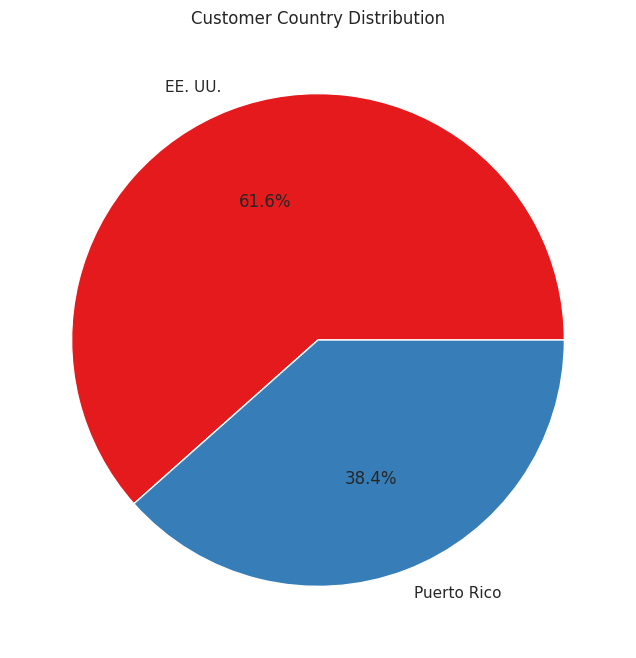

In [ ]:
# This pie chart visualizes the distribution of customer countries in the dataset.

plt.figure(figsize=(8, 8))
customer_country_counts = df['Customer Country'].value_counts()
plt.pie(customer_country_counts, labels=customer_country_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Customer Country Distribution')
plt.show()


### Interpretations:
1. **Customer Distribution**: 61.6% of the customers are from the United States, while 38.4% are from Puerto Rico, indicating a substantial customer base in both locations.
2. **Market Size**: The United States represents a larger market in terms of customer base compared to Puerto Rico.

### Business Implications:
1. **Market Focus**: The larger customer base in the United States suggests the potential for greater revenue generation, but it also implies a need for larger-scale logistics and customer service operations.
2. **Localized Strategies**: The significant customer presence in Puerto Rico indicates the importance of developing localized strategies that cater to this market's specific needs and preferences.
3. **Diversification**: The distribution suggests a diversified customer base, which could help mitigate market-specific risks.

### Recommendations:
1. **Tailored Marketing**: Create marketing campaigns that are tailored to the cultural and economic contexts of each country.
2. **Logistics Optimization**: Optimize logistics and supply chain strategies for each market to handle the differences in scale and customer distribution effectively.
3. **Localized Product Offerings**: Consider offering products or services that cater to the specific preferences and needs of customers in both the United States and Puerto Rico.

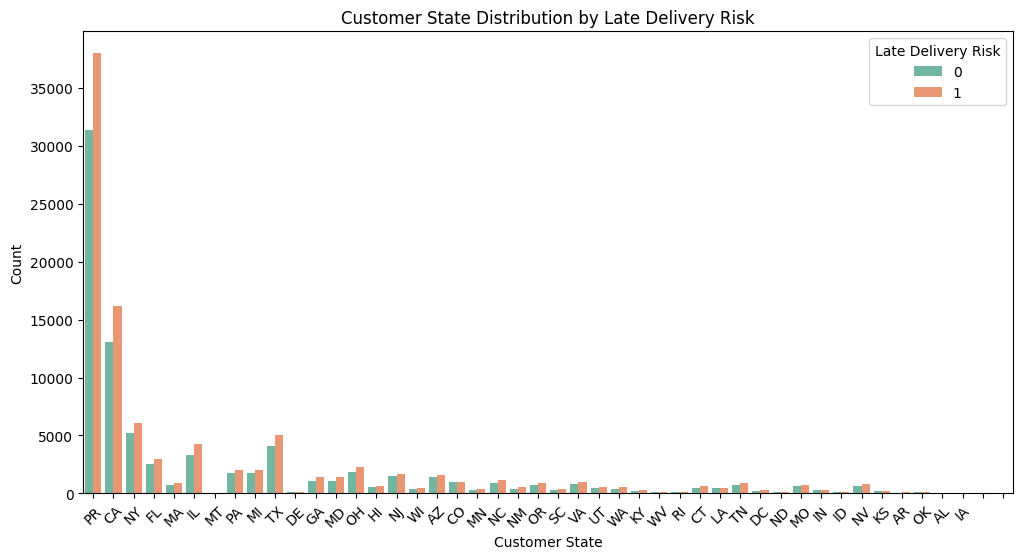

In [27]:
# This bar plot explores the distribution of customer states and their association with late delivery risk.
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Customer State', hue='Late_delivery_risk', data=df, palette='Set2')
plt.title('Customer State Distribution by Late Delivery Risk')
plt.xlabel('Customer State')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Get current tick labels
labels = [item.get_text() for item in ax.get_xticklabels()]

# Remove specific numbers from the tick labels
labels = [label if label not in ['95758', '91732'] else '' for label in labels]

# Set the modified tick labels
ax.set_xticklabels(labels)

plt.legend(title='Late Delivery Risk')
plt.show()


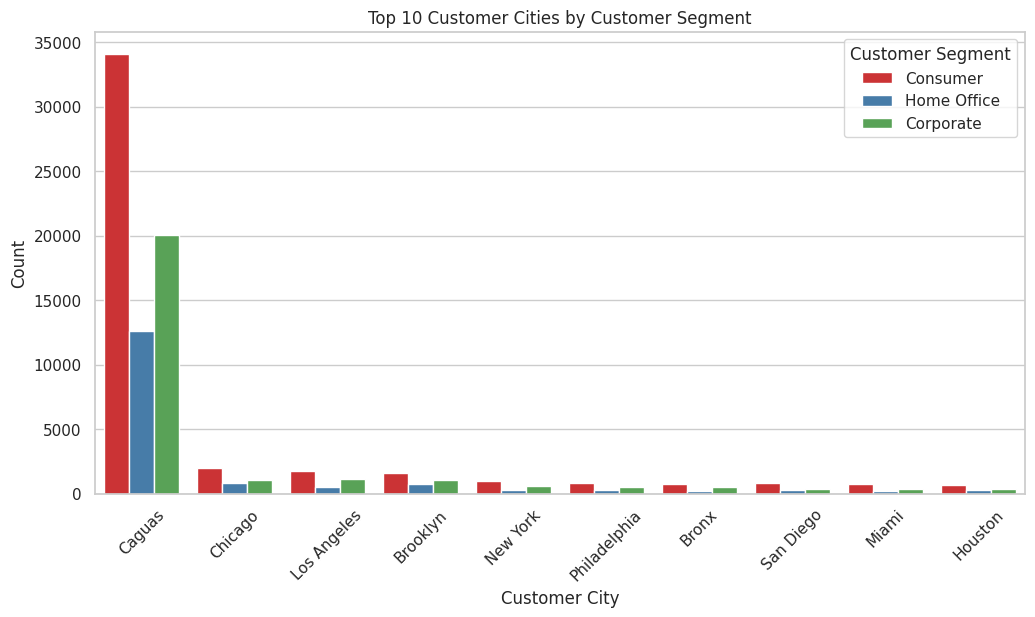

In [ ]:
# Bar Plot of Customer City Distribution by Customer Segment
plt.figure(figsize=(12, 6))
sns.countplot(x='Customer City', hue='Customer Segment', data=df, palette='Set1', order=df['Customer City'].value_counts().iloc[:10].index)
plt.title('Top 10 Customer Cities by Customer Segment')
plt.xlabel('Customer City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()



#### Interpretations:
1. **City-wise Customer Distribution**: The majority of customers are concentrated in a few cities, with Caguas showing a significantly higher customer count.
2. **Segment Concentration in Cities**: While Consumer customers dominate in most cities, there is a notable presence of Corporate and Home Office segments in certain areas.
3. **Urban vs. Rural Distribution**: The data suggests that urban areas may have a higher concentration of customers across all segments.

#### Business Implications:
1. **Targeted Marketing**: Urban areas, particularly those with high customer counts, could be targeted for specific marketing campaigns and product launches.
2. **Distribution Optimization**: Distribution centers and logistics strategies may need to be optimized for efficiency in cities with high customer concentrations.
3. **Segment-Specific Strategies**: The presence of different segments in these cities could indicate a need for varied strategies that cater to the unique needs of each segment.

#### Recommendations:
1. **Localized Marketing Initiatives**: Create marketing initiatives that are tailored to the top cities, considering the unique demographics and customer behaviors in each.
2. **Infrastructure Investment**: Invest in supply chain infrastructure in cities with high customer density to improve delivery times and reduce late delivery risk.
3. **Customer Outreach Programs**: Develop community engagement and outreach programs in these cities to build brand presence and loyalty.

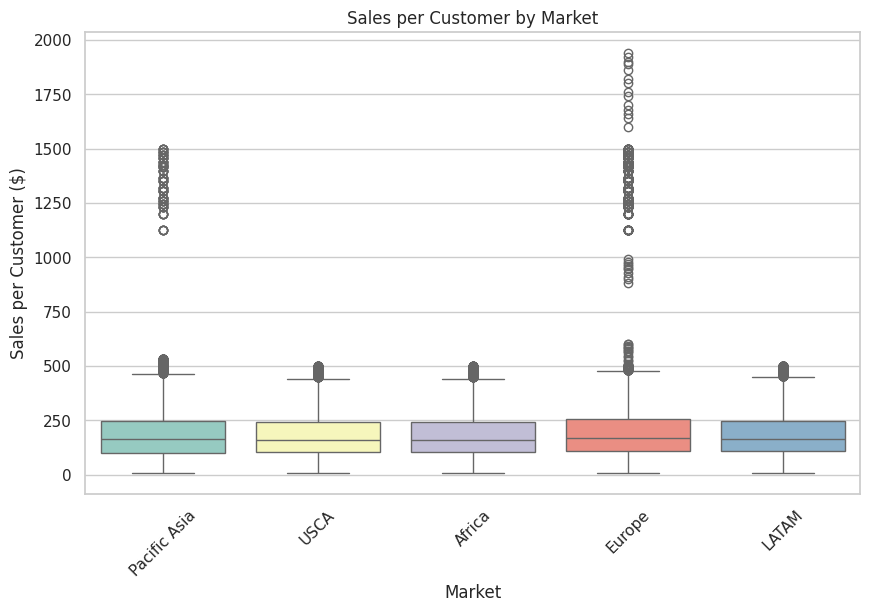

In [ ]:
# Boxplot of Sales per Customer by Market
plt.figure(figsize=(10, 6))
sns.boxplot(x='Market', y='Sales per customer', data=df, palette='Set3')
plt.title('Sales per Customer by Market')
plt.xlabel('Market')
plt.ylabel('Sales per Customer ($)')
plt.xticks(rotation=45)
plt.show()



#### Interpretations:
1. **Sales Distribution**: The median sales per customer are relatively consistent across markets, but there are noticeable outliers, especially in the Pacific Asia market, suggesting some customers have very high purchase amounts.
2. **Market Consistency**: The interquartile ranges are similar across markets, indicating a degree of consistency in customer spending within each market.
3. **Potential for Growth**: The presence of outliers may indicate untapped potential for increased sales in specific markets or with certain customers.

#### Business Implications:
1. **Targeted Marketing**: Understanding the distribution of sales can help tailor marketing efforts to capitalize on markets with higher spending outliers.
2. **Customer Segmentation**: There may be an opportunity to segment customers based on their spending and create customized offerings.
3. **Risk of Market Volatility**: Markets with greater sales variability may be more susceptible to fluctuations in customer spending habits.

#### Recommendations:
1. **High-Value Customer Programs**: Develop loyalty programs or personalized services for customers that represent the outliers in sales.
2. **Market-Specific Strategies**: Adapt sales strategies to account for the sales distribution in each market, potentially focusing on upselling and cross-selling where the interquartile range is higher.
3. **Customer Behavior Analysis**: Conduct in-depth analysis on the spending patterns of customers, especially in markets with significant outliers, to better understand their preferences and needs.


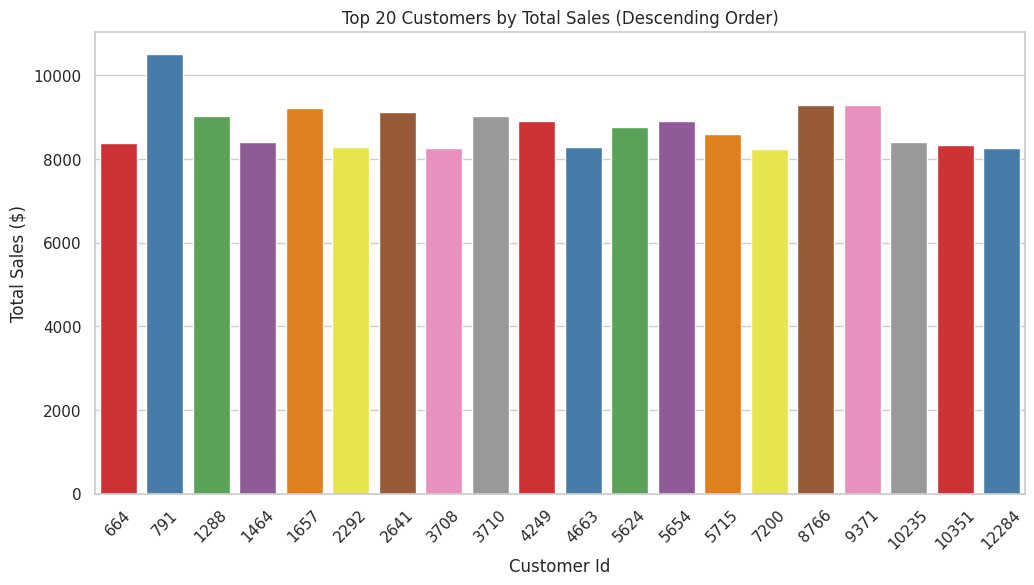

In [ ]:
# Calculate Total Sales per Customer
total_sales_per_customer = df.groupby('Customer Id')['Sales'].sum().sort_values(ascending=False)

# Select the Top 20 Customers in descending order
top_20_customers = total_sales_per_customer.head(20)[::-1]

# Create a Bar Plot for the Top 20 Customers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_customers.index, y=top_20_customers.values, palette='Set1')
plt.title('Top 20 Customers by Total Sales (Descending Order)')
plt.xlabel('Customer Id')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()
